## Homework 4 ADM - Hard Coding


### Import utils and Dataframe

In [ ]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial import distance
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [ ]:
## Mount Drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/ADM/Homework IV'

import os
os.chdir(path)

## Question 2 - Grouping songs together

We play with a dataset gathering songs from the International Society for Music Information Retrieval Conference. The tracks (songs) include much information. We focus on the track information, features and audio variables. 

### 2.1 - Getting data

In this step we load the data.

In [ ]:
## Load Data
df1 = pd.read_csv('echonest.csv')
df2 = pd.read_csv('features.csv')
df3 = pd.read_csv('tracks.csv')

### Data Wrangling

After uploading data, you move to the wrangling data step, that is the process of gathering, selecting, and transforming data to answer an analytical question.

Starting from the first set of data, the main information such as number of observations, number of features and types of data are checked.



In [ ]:
## Info on df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 250 entries, track_id to temporal_features_223
dtypes: float64(244), int64(1), object(5)
memory usage: 25.0+ MB


The dataset contains 13129 observations for 250 features.

Then check the presence of null values within the dataset.

In [ ]:
## Check NaN values on first dataset
df1.isnull().sum()[0:50]

track_id                                  0
audio_features_acousticness               0
audio_features_danceability               0
audio_features_energy                     0
audio_features_instrumentalness           0
audio_features_liveness                   0
audio_features_speechiness                0
audio_features_tempo                      0
audio_features_valence                    0
metadata_album_date                   10412
metadata_album_name                   10257
metadata_artist_latitude               3359
metadata_artist_location               3359
metadata_artist_longitude              3359
metadata_artist_name                      0
metadata_release                          0
ranks_artist_discovery_rank           10304
ranks_artist_familiarity_rank         10304
ranks_artist_hotttnesss_rank          10305
ranks_song_currency_rank              11096
ranks_song_hotttnesss_rank            10923
social_features_artist_discovery          0
social_features_artist_familiari

After a careful analysis of the null values for each variable, it emerges that some features such as **ranks_artist_discovery_rank** or **ranks_song_currency_rank**, for example, record more than 10000 null values, that is than 75% of the total observations. For this reason, an estimate of these values by interpolation would have been too distorted and therefore not precise and this leads us to the elimination of some variables listed below that contain more than 10000 null values.

In [ ]:
## Check the features with more and ugual than 10000 Null values (75% of observations).
df1.columns[df1.isnull().sum() >= 10000].tolist()

['metadata_album_date',
 'metadata_album_name',
 'ranks_artist_discovery_rank',
 'ranks_artist_familiarity_rank',
 'ranks_artist_hotttnesss_rank',
 'ranks_song_currency_rank',
 'ranks_song_hotttnesss_rank']

In [ ]:
## Drop the features with more than 10000 Null values
df1 = df1.drop(columns=['metadata_album_date', 'metadata_album_name', 'ranks_artist_discovery_rank', 'ranks_artist_familiarity_rank', 'ranks_artist_hotttnesss_rank',
                        'ranks_song_currency_rank', 'ranks_song_hotttnesss_rank'])

For feaures such as **metadata_artist_latitude**, **metadata_artist_location*, and **metadata_artist_longitude** the null values are 3359, so a lower percentage than the previous one, but still considerable. Again, the approach is to eliminate the features as in the previous case.

In [ ]:
## Drop the features 
df1 = df1.drop(columns=['metadata_artist_latitude','metadata_artist_location','metadata_artist_longitude'])

In [ ]:
## Check
df1.isnull().sum()[0:50]

track_id                              0
audio_features_acousticness           0
audio_features_danceability           0
audio_features_energy                 0
audio_features_instrumentalness       0
audio_features_liveness               0
audio_features_speechiness            0
audio_features_tempo                  0
audio_features_valence                0
metadata_artist_name                  0
metadata_release                      0
social_features_artist_discovery      0
social_features_artist_familiarity    0
social_features_artist_hotttnesss     0
social_features_song_currency         0
social_features_song_hotttnesss       0
temporal_features_000                 0
temporal_features_001                 0
temporal_features_002                 0
temporal_features_003                 0
temporal_features_004                 0
temporal_features_005                 0
temporal_features_006                 0
temporal_features_007                 0
temporal_features_008                 0


The same operations carried out on the first dataset, are also repeated on the second.

In [ ]:
## Info on df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Columns: 519 entries, track_id to zcr_std_01
dtypes: float64(518), int64(1)
memory usage: 422.0 MB


The dataset contains 106574 observations for 519 features.

In [ ]:
## Check NaN values on second dataset
df2.isnull().sum()


track_id                   0
chroma_cens_kurtosis_01    0
chroma_cens_kurtosis_02    0
chroma_cens_kurtosis_03    0
chroma_cens_kurtosis_04    0
                          ..
zcr_mean_01                0
zcr_median_01              0
zcr_min_01                 0
zcr_skew_01                0
zcr_std_01                 0
Length: 519, dtype: int64

In this case, there are no null values.

The same operations carried out on the third dataset.

In [ ]:
## Info on df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   track_id                  106574 non-null  int64  
 1   album_comments            106574 non-null  int64  
 2   album_date_created        103045 non-null  object 
 3   album_date_released       70294 non-null   object 
 4   album_engineer            15295 non-null   object 
 5   album_favorites           106574 non-null  int64  
 6   album_id                  106574 non-null  int64  
 7   album_information         83149 non-null   object 
 8   album_listens             106574 non-null  int64  
 9   album_producer            18060 non-null   object 
 10  album_tags                106574 non-null  object 
 11  album_title               105549 non-null  object 
 12  album_tracks              106574 non-null  int64  
 13  album_type                100066 non-null  o

The dataset contains 106574 observations for 53 features.

In [ ]:
## Check NaN values on second dataset
df3.isnull().sum()

track_id                         0
album_comments                   0
album_date_created            3529
album_date_released          36280
album_engineer               91279
album_favorites                  0
album_id                         0
album_information            23425
album_listens                    0
album_producer               88514
album_tags                       0
album_title                   1025
album_tracks                     0
album_type                    6508
artist_active_year_begin     83863
artist_active_year_end      101199
artist_associated_labels     92303
artist_bio                   35418
artist_comments                  0
artist_date_created            856
artist_favorites                 0
artist_id                        0
artist_latitude              62030
artist_location              36364
artist_longitude             62030
artist_members               59725
artist_name                      0
artist_related_projects      93422
artist_tags         

In the third dataset, there are many features that have null values. However, the interest in this case shifts to the variables that may serve to make the clustering of songs. For this reason, features such as **song’s duration**, **language**, **country** and **genre**.


Extract the fratures of interest by third dataset: song's duration, language, country and genre.


In [ ]:
## Song's duration
song_duration = df3.track_duration

In [ ]:
## Language
song_language = df3.track_language_code

In [ ]:
## Genre
song_genre = df3.track_genre_top 

At this point, you join the first and second datasets using the common key **track_id**. Given the type of features present in the third dataset, we choose to keep from this only the features listed above and then add them to the dataset transformed with the PCA to keep the original interpretation.

In [ ]:
## Interscetion df1 Vs. df2
set(df1.columns).intersection(set(df2.columns))

{'track_id'}

In [ ]:
## Join
df = pd.merge(left = df1, right = df2, left_on = 'track_id', right_on = 'track_id')

In [ ]:
## Info on data 
df.info()
## Check the rows of dataset(13K)...it's right.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 758 entries, track_id to zcr_std_01
dtypes: float64(755), int64(1), object(2)
memory usage: 76.0+ MB


The final dataset contains 13129 observations and 761 features, obviously without missing values.

In [ ]:
## Check
df.columns[df.isnull().sum() >= 1].tolist()

[]

The final dataset looks like this...

In [ ]:
## Check the head of dataset.
df.head(5)

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_artist_name,metadata_release,social_features_artist_discovery,social_features_artist_familiarity,social_features_artist_hotttnesss,social_features_song_currency,social_features_song_hotttnesss,temporal_features_000,temporal_features_001,temporal_features_002,temporal_features_003,temporal_features_004,temporal_features_005,temporal_features_006,temporal_features_007,temporal_features_008,temporal_features_009,temporal_features_010,temporal_features_011,temporal_features_012,temporal_features_013,temporal_features_014,temporal_features_015,temporal_features_016,temporal_features_017,temporal_features_018,temporal_features_019,temporal_features_020,temporal_features_021,temporal_features_022,temporal_features_023,...,tonnetz_max_04,tonnetz_max_05,tonnetz_max_06,tonnetz_mean_01,tonnetz_mean_02,tonnetz_mean_03,tonnetz_mean_04,tonnetz_mean_05,tonnetz_mean_06,tonnetz_median_01,tonnetz_median_02,tonnetz_median_03,tonnetz_median_04,tonnetz_median_05,tonnetz_median_06,tonnetz_min_01,tonnetz_min_02,tonnetz_min_03,tonnetz_min_04,tonnetz_min_05,tonnetz_min_06,tonnetz_skew_01,tonnetz_skew_02,tonnetz_skew_03,tonnetz_skew_04,tonnetz_skew_05,tonnetz_skew_06,tonnetz_std_01,tonnetz_std_02,tonnetz_std_03,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,AWOL,AWOL - A Way Of Life,0.388990,0.386740,0.406370,0.000000,0.000000,0.877233,0.588911,0.354243,0.295090,0.298413,0.309430,0.304496,0.334579,0.249495,0.259656,0.318376,0.371974,1.000,0.5710,0.278,0.2100,0.2150,0.2285,0.2375,0.279,0.1685,0.1685,0.279,0.3325,...,0.318972,0.059690,0.069184,-0.002570,0.019296,0.010510,0.073464,0.009272,0.015765,-0.003789,0.017786,0.007311,0.067945,0.009488,0.016876,-0.059769,-0.091745,-0.185687,-0.140306,-0.048525,-0.089286,0.752462,0.262607,0.200944,0.593595,-0.177665,-1.424201,0.019809,0.029569,0.038974,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,AWOL,AWOL - A Way Of Life,0.388990,0.386740,0.406370,0.000000,0.000000,0.534429,0.537414,0.443299,0.390879,0.344573,0.366448,0.419455,0.747766,0.460901,0.392379,0.474559,0.406729,0.506,0.5145,0.387,0.3235,0.2805,0.3135,0.3455,0.898,0.4365,0.3385,0.398,0.3480,...,0.214807,0.070261,0.070394,0.000183,0.006908,0.047025,-0.029942,0.017535,-0.001496,-0.000108,0.007161,0.046912,-0.021149,0.016299,-0.002657,-0.097199,-0.079651,-0.164613,-0.304375,-0.024958,-0.055667,0.265541,-0.131471,0.171930,-0.990710,0.574556,0.556494,0.026316,0.018708,0.051151,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,AWOL,AWOL - A Way Of Life,0.388990,0.386740,0.406370,0.000000,0.000000,0.548093,0.720192,0.389257,0.344934,0.361300,0.402543,0.434044,0.388137,0.512487,0.525755,0.425371,0.446896,0.511,0.7720,0.361,0.2880,0.3310,0.3720,0.3590,0.279,0.4430,0.4840,0.368,0.3970,...,0.180027,0.072169,0.076847,-0.007501,-0.018525,-0.030318,0.024743,0.004771,-0.004536,-0.007385,-0.018953,-0.020358,0.024615,0.004868,-0.003899,-0.128391,-0.125289,-0.359463,-0.166667,-0.038546,-0.146136,1.212025,0.218381,-0.419971,-0.014541,-0.199314,-0.925733,0.025550,0.021106,0.084997,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Kurt Vile,Constant Hitmaker,0.557339,0.614272,0.798387,0.005158,0.354516,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,0.368756,0.440775,0.263,0.7360,0.273,0.4260,0.2140,0.2880,0.8100,0.246,0.2950,0.

A final cleanup of the data before proceeding with the next step concerns the removal of the variable **track_id** because it represents a unique code of the song and therefore it makes no sense to include it within the PCA and the removal of some categorical features that cannot be included within the PCA and K-means at a later date.

In [ ]:
df = df.drop(columns=['track_id', 'metadata_artist_name', 'metadata_release'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 755 entries, audio_features_acousticness to zcr_std_01
dtypes: float64(755)
memory usage: 75.7 MB


Now you can apply a method for the reduction of dimensionality.

### 2.2 - Choose your features

Before defining the method used in this case, it is necessary to define what is generally meant by reduction of dimensionality.

### 2.2.1 Problem of the reduction

I observe a vector of $x_i \in R^{p}$, I look for a way to map the data
$x_i \xrightarrow{} z_i \in R^{q}$ ; with $q < p$
making sure that:
- Preserve some relevant information of the distribution of $X$.
- I can return to the starting space $z_i \xrightarrow{} x_i$.

Example: I want to map red dots $x_i \in R^{2}$ to $R$ so I don’t
lose information about centrality/dispersion.
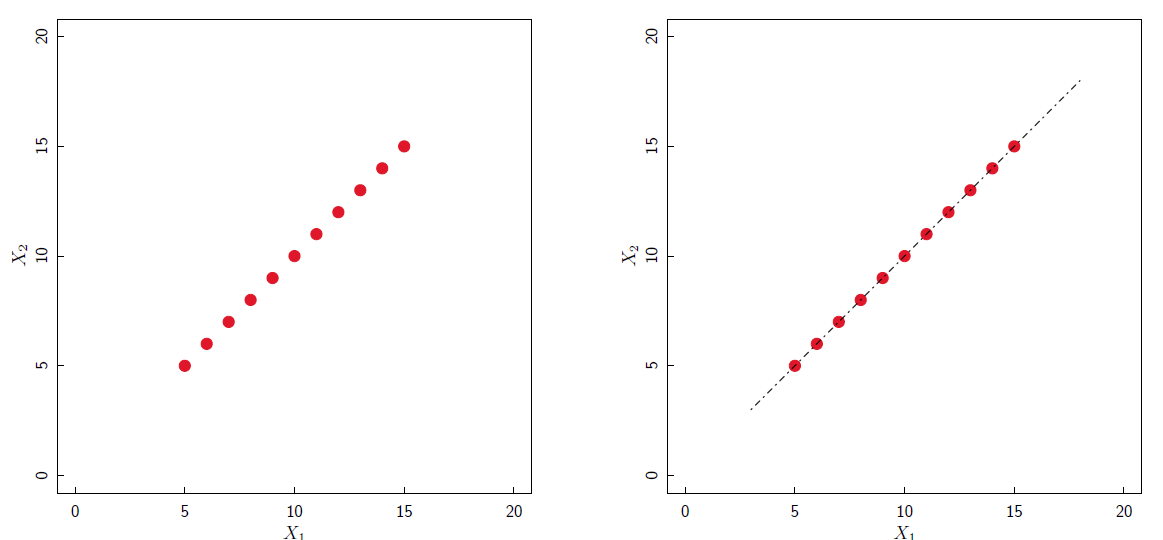


Returning to the example of before: wanting to memorize all the red dots I need to memorize the $2 \times n$ values $f({xi_1; xi_2})$,
exploiting the fact that the points are on the line:

- $X_2 = a + bX_1$

I could, for example, only memorize the first coordinate
$(x1_1; x2_1; ... ; xn_1)$ and then the coefficient pair $(a; b)$, then pass
from $2n$ values to $n + 2$ values.

### 2.2.2 - Principal Component Analysis (PCA)

The **PCA** technique was chosen for the reduction of dimensionality.

**Advantages**:

- Removes Correlated Features
- Improves Algorithm Performance
- Reduces Overfitting
-  Improves Visualization

**Goal**:
- transform the original variables $X = (X_1, X_2, ..., X_p)'$ in $Z = (Z_1, Z_2, ..., Z_p)'$. 
- The transformation is linear type: $Z_j = ϕ_{1_{j}} \times X_1 + ϕ_{2_{j}} \times X_2 + ... + ϕ_{p_{j}} \times X_p.$
- The coefficients $ϕ_j$ are called **loadings** of the components.
- The main components are ordered by decreasing and incorrectly distributed variance.
We also want the Zs to preserve all the variance content in X so as to represent just another dimension in which to look at the data, but without losing information. Only later, with the analysis of the main components, it is decided how much part of variability, where by variability is meant information, capture with the components.
There is no defined number of variance to cumulate, it depends a lot on the specific case. Usually it does not fall below 70% and in some cases even 80%, such as in the compression of pixels of images.

Before proceeding with the PCA it is necessary to standardize the features.
This step is important, as the PCA searches for components along the directions in which variance is maximized. If we did the exercise of plotting the original variances for each variable, these would be misleading as they would suggest that only variables with greater variance contribute to the information of the data, while standardizing the variables, The situation changes and improves PCA performance.

In [ ]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)
df_scale = pd.DataFrame(df_scale)
df_scale.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754
0,-0.281499,0.991915,0.348732,-1.742887,-0.064267,0.437749,1.223573,0.495983,0.584512,0.782963,0.447205,-0.15861,-0.537540,2.602372,0.919566,-0.082752,-0.092399,-0.481088,-0.130599,-0.224785,-0.178109,-0.586609,-0.732929,0.149177,0.245649,2.655370,0.828443,-0.099867,-0.239930,-0.471167,-0.179055,-0.174634,-0.015079,-0.590848,-0.664598,0.401624,0.435481,-1.187552,0.768230,-0.514756,...,-0.024206,-0.695639,-0.184375,-0.281040,1.230567,0.180082,1.029232,0.837030,1.520077,-0.414588,1.149987,0.121949,0.884728,0.859322,1.576897,1.324580,0.507170,1.322830,1.691190,0.994173,-0.602813,1.493278,0.343301,0.323768,1.185503,-0.526961,-3.213633,-1.376319,-0.040156,-1.737526,-1.310092,-1.564443,-1.654377,-0.381721,0.393540,1.208676,1.035766,-0.594301,-0.378710,0.932033
1,-0.391656,0.217484,1.006860,-1.767172,-0.518358,2.639805,0.110726,-0.617788,0.584512,0.782963,0.447205,-0.15861,-0.537540,0.522280,0.610138,0.589480,0.713942,-0.150159,0.326192,0.701000,2.969636,1.126624,0.253437,1.499448,0.513654,0.463686,0.572093,0.556746,0.617020,-0.094269,0.412044,0.581684,3.813134,1.321576,0.346295,1.331264,0.534571,-0.219016,0.051239,-0.088406,...,-1.149175,-0.239190,-0.130131,-0.041981,0.289546,0.810686,-0.695398,1.772551,-0.334457,-0.087693,0.317707,0.766449,-0.529523,1.615245,-0.494903,0.475378,0.790525,1.548409,-0.001003,2.089565,0.841209,0.620469,-0.287215,0.267141,-1.841999,1.400393,1.632515,-0.426613,-1.525809,-1.381420,-1.021250,-1.202410,-0.608422,-0.439876,0.432798,1.168234,0.742018,-0.594301,-0.526657,1.267315
2,-1.253885,1.358338,0.589683,-1.770366,1.172705,0.185049,-0.651745,0.659017,0.584512,0.782963,0.447205,-0.15861,-0.537540,0.605188,1.708388,0.181548,0.327181,-0.030244,0.615368,0.818482,0.229910,1.544675,1.244655,1.074195,0.823395,0.485869,1.740413,0.400123,0.348987,0.196316,0.818859,0.676223,-0.015079,1.367959,1.211500,1.096901,0.847824,-0.158188,-0.120999,-0.882645,...,-1.524798,-0.156829,0.159060,-0.709186,-1.642357,-0.524986,0.216642,0.327335,-0.661011,-0.733933,-1.727929,-0.328367,0.196931,0.346507,-0.626618,-0.232317,-0.278688,-0.537342,1.419312,1.457991,-3.044718,2.317048,0.272540,-0.888083,0.023395,-0.582432,-1.994035,-0.538400,-1.197730,-0.391558,-1.708717,-1.479675,-1.162289,-0.360920,-0.091584,-0.042573,-0.158812,-0.594301,-0.337701,0.226443
3,1.112791,0.898745,1.391929,0.898939,-0.457654,-0.481812,-0.328958,1.897809,2.053342,2.556413,3.388650,3.34078,5.183888,-0.831008,1.655575,-0.326785,1.637571,-0.821258,-0.035374,3.236081,-0.249650,0.414377,-0.909919,0.584729,0.776190,-0.614409,1.577075,-0.129987,1.390918,-0.476921,0.234714,3.834551,-0.219168,0.311844,-0.691357,0.651611,0.777502,-1.711390,-0.382097,-1.186813,...,-1.388580,1.782949,-0.606816,-1.937858,-1.630512,-0.058095,-1.432959,0.802858,0.589182,-1.952502,-1.740793,-0.117614,-1.262910,0.587165,0.506931,0.232828,-1.910872,0.382314,-0.399938,0.819464,1.950749,-0.097895,-0.518105,-0.037645,-2.041049,2.910786,0.874657,-1.142293,0.290955,-0.297983,-0.707981,-0.520648,-1.317931,-0.071044,0.351477,0.896399,1.055350,-0.594301,0.197164,0.053735
4,-0.188870,0.136465,0.082343,-1.718498,-0.577286,3.103507,-0.251046,1.645950,0.584512,0.782963,0.447205,-0.15861,-0.537540,0.985987,0.800945,0.477721,0.334437,0.081742,1.080411,0.555364,0.700433,0.867666,0.657402,1.545186,0.293827,0.942840,0.710477,0.412171,0.288586,0.081233,0.992712,0.382100,0.757985,0.747135,0.593071,1.503130,0.176569,-0.022105,0.357474,-0.101561,...,-0.920102,0.041167,0.791719,0.564267,1.360788,-0.788587,-0.555680,0.667138,-0.166224,0.357281,1.357913,-0.773565,-0.416653,0.560142,-0.213075,1.240293,-2.636852,0.845372,-0.252670,0.935509,0.931312,1.807584,-1.593276,0.212365,-0.961358,0.343816,0.427158,-0.726957,-0.142849,-1.099036,-1.171979,-0.81769

In [ ]:
## Implement PCA
pca = PCA()
pca.fit(df_scale)

## Cumulated Variance and extract the number of components which cumulate > 70% of total variance.
cumvar = np.cumsum(pca.explained_variance_ratio_)
cumvar = cumvar[cumvar <= 0.70].tolist()
comp = len(cumvar) + 1 

In [ ]:
## Explained Variance Ratio
np.cumsum(pca.explained_variance_ratio_)[0:100]

array([0.1080524 , 0.18448808, 0.2208393 , 0.24999421, 0.27572699,
       0.29969785, 0.32238567, 0.34413393, 0.36420684, 0.38171801,
       0.39785179, 0.41220401, 0.42570554, 0.43867622, 0.45123161,
       0.46285066, 0.47437718, 0.48568284, 0.49614924, 0.50629368,
       0.51617265, 0.524697  , 0.53273209, 0.54033421, 0.54755404,
       0.55414613, 0.56066346, 0.56672783, 0.57257453, 0.57812457,
       0.58359364, 0.58882496, 0.59399115, 0.59894491, 0.60372394,
       0.60836552, 0.61293231, 0.61739253, 0.62177469, 0.62596953,
       0.63004576, 0.63402986, 0.6379555 , 0.6418094 , 0.64552984,
       0.64913323, 0.65267055, 0.65606222, 0.65945144, 0.66275489,
       0.66603992, 0.66922337, 0.67234985, 0.67545908, 0.67851901,
       0.68148124, 0.68439171, 0.68725278, 0.69009632, 0.69288388,
       0.69564991, 0.69837672, 0.70108335, 0.7037162 , 0.70633711,
       0.7088601 , 0.71135108, 0.71380461, 0.71622181, 0.71862291,
       0.72097241, 0.72331012, 0.72561747, 0.72789759, 0.73017

The first 100 components found are observed. Fixed the minimum threshold of variance that we want to maintain, that is 70%, we see the last component to maintain to preserve this threshold of variability.

In [ ]:
## Result
print('70% of variance is caught by', comp, 'components')

70% of variance is caught by 63 components


As we can see, the 70% of variance is caught by 63 components.


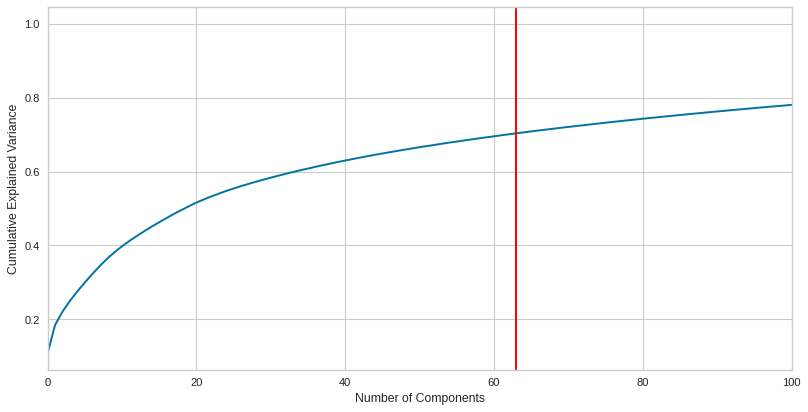

In [ ]:
## Plot of Cumulative Variance
figure(figsize = (12, 6), dpi = 80)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(comp, color = 'red');
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlim((0,100))
print('As we can see, the 70% of variance is caught by', comp, 'components.')

### 2.3 - Clustering

### 2.3.1 Implementation of K-Means

#### PseudoCode

**Algorithm**: Lloyd’s approximate K-Means

**input** : X, K, an initial random partition $C_1^{0}, C_2^{0}, ..., C_k^{0}$

Set: $s <- 0$

Set: $itera <- TRUE$

while $(itera == TRUE)$ **do**

  - Step A: Calculates the group centers from the previous partition.
  
  - Step B : creates a new partition by assigning a point i to the group with the nearest center.
  
  - Convergence check
  
  - itera <- FALSE if  $C_k^{(s+1)} = C_k^{s} \forall k = 1, 2, ..., K$

end

**return** final partition $C_1^{(s+1)}, C_2^{(s+1)}, ..., C_k^{(s+1)}.$ 

Extract Score: $Z = X \times ϕ$.

In [ ]:
## Extract Score
Z = pca.transform(df_scale)
Z = pd.DataFrame(Z)
## We extract the projection of X in the principal components.

## Extract first 64 cocmponents.
Z = Z.iloc[0:, :comp]

In [ ]:
Z.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,3.064849,-2.831589,-5.729978,4.316744,3.129221,2.052358,6.770295,-0.866999,-2.207433,4.398128,-4.815142,1.518511,-4.292408,5.288776,-0.313838,2.191539,-0.964954,-0.942773,1.600828,0.739939,-2.261945,-0.835331,-1.989693,1.663556,0.245751,-3.182379,0.320655,0.957173,3.210551,-0.600194,1.330839,-1.316388,-0.002667,-0.698462,-1.729454,1.856724,-1.506390,2.377169,-0.660971,-0.340542,-3.263969,-0.013245,-1.443718,-0.717360,1.682789,0.489983,2.042114,1.332147,-0.296035,0.473354,0.611951,0.937544,-0.104555,1.616836,-1.153070,-1.585754,-0.220216,-0.528155,-1.146545,-2.422353,1.069767,0.277392,-0.295876
1,5.775029,-5.416029,-5.295198,-1.580781,-3.646130,2.632201,-1.540514,5.934789,-0.102422,4.215868,-2.155764,2.505115,-0.911807,3.826839,1.978222,1.414908,-1.844117,-3.983110,-0.612405,1.483711,0.388609,-1.442001,-0.015714,3.585421,0.389612,-1.065766,1.388909,-0.447937,1.236075,0.068605,2.067720,-0.540475,-0.592127,0.728173,-3.090387,-0.439931,-0.979652,1.361186,2.549790,2.357500,-0.316553,-0.861418,-0.851712,-1.466467,3.362865,0.812371,-0.262717,0.972362,0.592669,-1.066389,-1.160548,0.454529,-1.079982,-0.083025,-2.599944,-1.170376,-0.195097,-1.238873,-0.149774,-0.507287,-0.650328,0.893198,0.411697
2,2.648080,-4.175493,-4.569957,-0.041332,-2.860837,2.094845,-1.275281,-0.315749,-0.100084,1.836875,-2.051694,3.126571,-3.259031,2.596994,0.170699,2.231499,-0.516802,-3.101971,2.411321,-1.503274,-2.913391,-1.394451,2.218486,2.838376,-0.615166,-1.928976,1.820476,-0.247708,0.094223,-0.150519,1.272948,2.772211,1.085103,-2.039939,-0.312135,0.725741,-1.641434,0.397542,2.004948,1.564528,-1.373810,-0.345909,-1.141654,-1.377168,-0.650188,1.458724,0.781534,-0.027286,-2.021507,0.442614,-0.210446,2.216602,-1.473105,2.036536,-3.116759,-0.907232,-2.361728,0.615146,-0.838890,-1.202350,-1.199162,1.506561,1.375364
3,9.234913,3.775000,-5.545841,0.699968,-1.413928,0.426163,-1.814266,4.046189,-0.539085,4.977383,-1.920963,6.719147,2.054402,0.310927,-1.547769,-4.132607,-0.089768,-2.731083,3.527946,-1.013561,-2.586001,3.323053,-2.332978,0.005254,2.041952,-0.829880,-1.756317,0.793297,0.194241,2.571039,-1.735934,-2.696700,2.455623,-0.591208,0.274002,-5.769041,-1.246138,-0.044766,-0.178684,1.059918,-1.444050,-0.220837,-0.434316,-2.658855,2.505102,1.622691,0.560247,-0.232789,-4.291800,-0.568013,2.583597,0.486105,1.730453,-0.677343,-0.684793,-0.127586,1.130949,-0.471296,0.406995,-0.636077,0.709149,0.194866,1.737456
4,1.306618,-9.465927,-4.280237,0.747145,-3.842896,-1.208390,-2.934347,-2.197162,-0.511378,2.553976,-0.510711,1.405750,-1.352031,1.074685,-0.928036,1.833188,2.295927,-1.669374,0.631459,2.418053,-0.078134,-2.432385,0.269018,0.174332,-1.215254,-2.270264,2.394836,0.326568,1.607412,1.108830,-1.255134,-0.327092,0.876635,-2.208845,-0.654325,0.566157,-1.348874,-1.198655,2.135779,-0.575339,-1.347962,-0.427463,-0.607911,0.337198,1.477528,0.253536,-0.247333,-0.372204,-0.907106,-0.152948,0.235667,-0.025401,0.749870,0.541306,-0.074447,-2.240163,-0.742984,-2.546209,0.703664,-2.418568,-2.549477,2.344405,0.475233


In [ ]:
## Implementation of K-Means
def kmeans(X, k, n_iter = 100):
  if isinstance(X, pd.DataFrame):X = X.values
  first = first_cluster(X, k, n_iter)
  clusters, centroids = make_clusters(X, k, first, n_iter)
  return clusters, centroids

def first_cluster(X, k, n_iter):
  idx = np.random.choice(len(X), k, replace=False)
  centers = X[idx, :]
  cluster = np.argmin(distance.cdist(X, centers, 'euclidean'), axis = 1)
  return cluster

def make_clusters(X, k, first_cluster, n_iter):
  cluster = first_cluster
  for _ in range(n_iter):
    centers = []
    for i in range(k):
      centers.append(X[cluster == i,:].mean(axis = 0))
    centers = np.vstack(centers)
    tmp = np.argmin(distance.cdist(X, centers, 'euclidean'), axis = 1)
    if np.array_equal(cluster,tmp):
      break
    cluster = tmp
    return cluster, centers 

In [ ]:
## Check for 3 cluster
cluster, centroids = kmeans(Z, 3, 100)

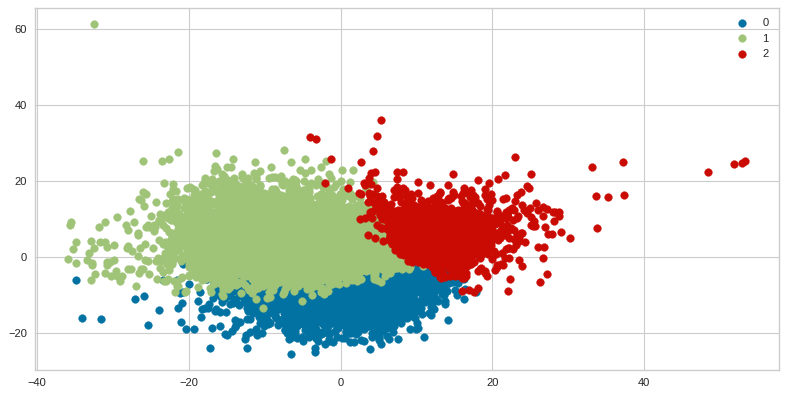

In [ ]:
## Plot Clustering
Z = Z.to_numpy()
figure(figsize = (12, 6), dpi = 80)
u_labels = np.unique(cluster)
for i in u_labels:
    plt.scatter(Z[cluster == i , 0] , Z[cluster == i , 1] , label = i)
plt.legend()
plt.show()

### 2.3.2 Find an optimal number of clusters
#### **Validation** 
Clustering is an unsupervised task. Ex-post we cannot compare results with **ground-truth*. However, we need tools that somehow give us a measure of the quality of clustering.

#### **Internal Validation**
It refers to the fact that the validation of a partition is done using only the information contained in the input data set.

#### **Choice of number of groups K**
- In some methods it is seen as an estimation problem, this presupposes the existence of a model that defines a *true* $K$.
- In many applications different K values could give a *good* representation of the population.
- the choice of K is a problem of validation rather than estimation.

> Elbow Method


In [ ]:
## Cluster for different k
k = 30

clusters = []
centroids = []

for k in range(2, k+1):
  cluster, centroid = kmeans(Z, k)
  clusters.append(cluster)
  centroids.append(centroid)

In [ ]:
## WSS
WSS = []
for i in centroids:
  within = np.min(distance.cdist(Z, i, 'euclidean'), axis = 1)
  within = within ** 2
  WSS.append(sum(within))

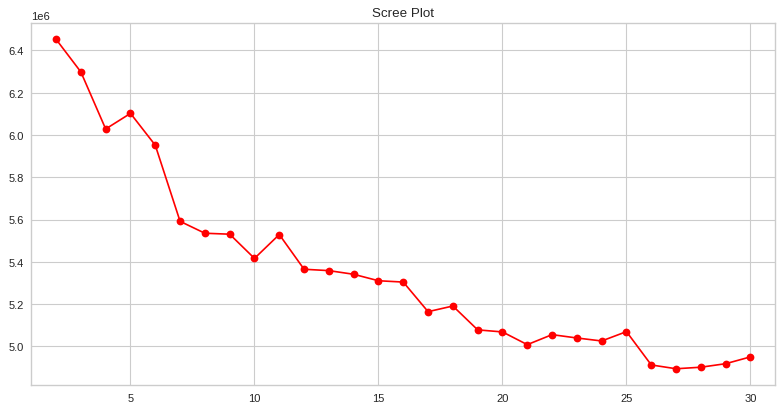

In [ ]:
## Scree Plot
x = []
for i in range(2, k+1):
  x.append(i)
plt.figure(figsize = (12, 6), dpi = 80)
plt.plot(x, WSS, 'o-', linewidth = 1.5, color = 'red')
plt.title('Scree Plot')
plt.xlim(1, 31)
plt.show()

By plotting the **WSS** for each K value and using the **Elbow method**, you notice that there is not a single optimal value of k. Surely an important structure is suggested for a value of *k* equal to *8* and for a value of *k* equal to *12.*

> Silhouette Width
##### **Inputs**:
- Vector with cluster labels, dissimilarity matrix.
##### **Philosophy**:
- In a good clustering each point is well connected to its cluster, while it is poorly connected to other clusters.
##### **Silhouette Width di i**:
- $s(i) = \frac{b(i) - a(i)}{\max({a(i),b(i)})}$, with $s(i) \in [-1, 1]$
- $s(i) \approx 1: i$ is well accommodated in its cluster

- $s(i) \approx -1: i$ would be better in another cluster

- $s(i) \approx 0: i$ is a transition region between two clusters
##### **Average Silhouette Width**:
- $ASW = \frac{1}{n} \sum_{i=1}^n s(i)$

**Note**: we want clustering with a high ASW.


### 2.3.3 - Run the algorithm on the data that you got from the dimensionality reduction

In [ ]:
## Run the algorithm on the data that you got from the dimensionality reduction.
## K = 8
k_8 = 8
cluster_8, centroids_8 = kmeans(Z, k_8, 100)

In [ ]:
Z = pd.DataFrame(Z)

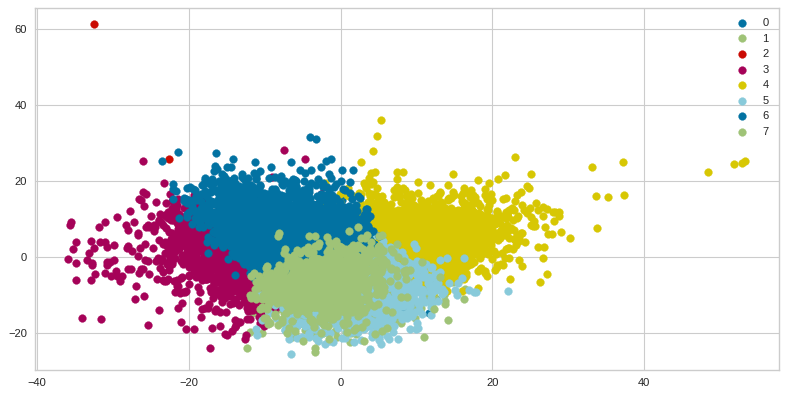

In [ ]:
## Plot Clustering
Z = Z.to_numpy()
figure(figsize = (12, 6), dpi = 80)
u_labels = np.unique(cluster_8)
for i in u_labels:
    plt.scatter(Z[cluster_8 == i , 0] , Z[cluster_8 == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
## Run the algorithm on the data that you got from the dimensionality reduction.
## K = 12
k_optimal = 12
cluster_12, centroids_12 = kmeans(Z, k_optimal, 100)

In [ ]:
Z = pd.DataFrame(Z)

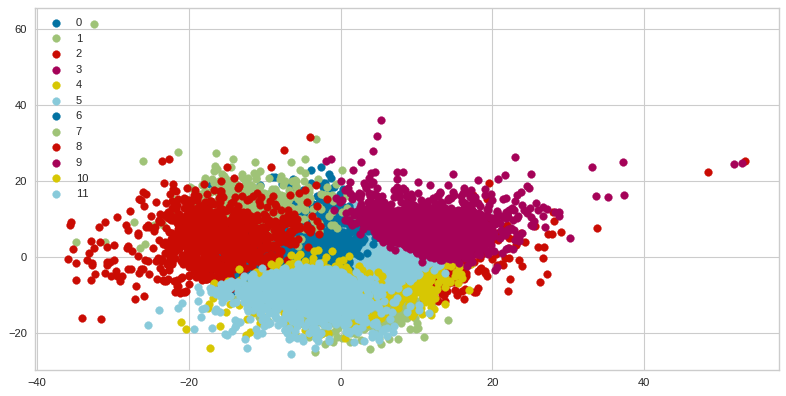

In [ ]:
## Plot Clustering
Z = Z.to_numpy()
figure(figsize = (12, 6), dpi = 80)
u_labels = np.unique(cluster_12)
for i in u_labels:
    plt.scatter(Z[cluster_12 == i , 0] , Z[cluster_12 == i , 1] , label = i)
plt.legend()
plt.show()

### 2.3.4 - K-Means++

Both **K-means** and **K-means++** are clustering methods which comes under unsupervised learning. The main difference between the two algorithms lies in:

- the selection of the centroids around which the clustering takes place.
- k means++ removes the drawback of K means which is it is dependent on initialization of centroid.

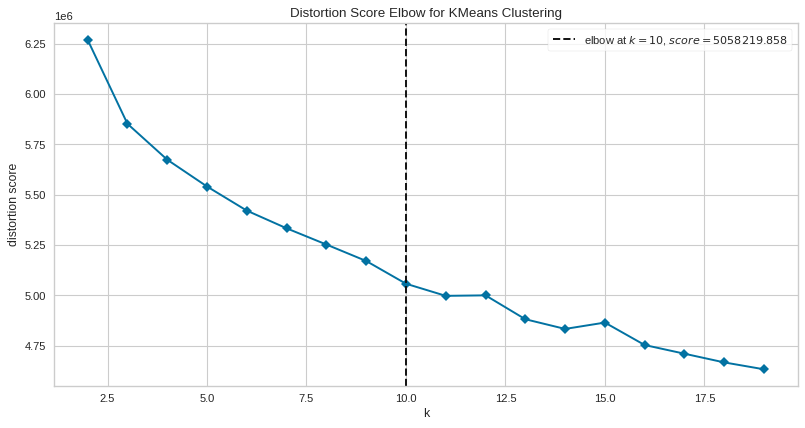

In [ ]:
## Metric = Distortion, which computes the sum of squared distances from each point to its assigned center. 
figure(figsize = (12, 6), dpi = 80)
model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k = (2,20), metric = 'distortion', timings = False)
visualizer.fit(Z)
visualizer.show()

By using **k-means++** and following the **Elbow** method, the optimal **value** is *k = 7* with a distortion score of *5333279.101*. In this sense, the choice of the optimal k does not differ much from that obtained with the kmeans from scratch.

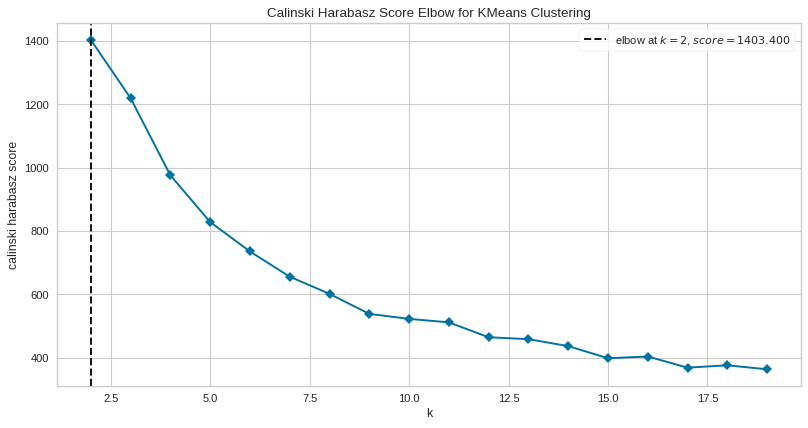

In [ ]:
## Metric = Calinski-Harabaszion, which score computes the ratio of dispersion between and within clusters.
figure(figsize = (12, 6), dpi = 80)
visualizer = KElbowVisualizer(model, k = (2,20), metric = 'calinski_harabasz', timings = False)
visualizer.fit(Z)
visualizer.show()

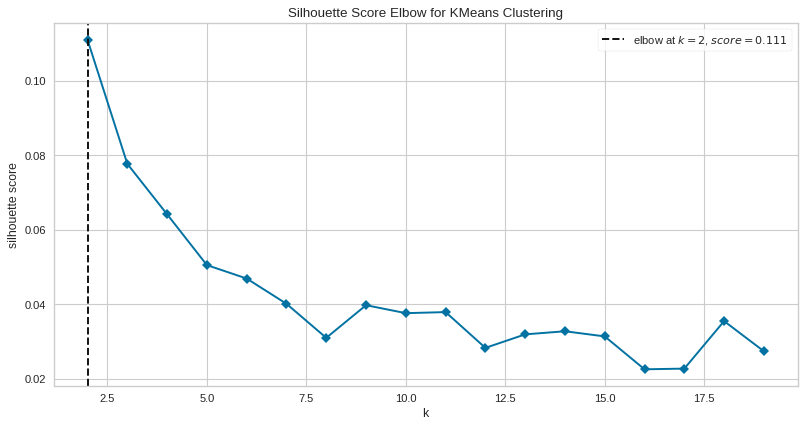

In [ ]:
## Metric = Silhouette, which score calculates the mean Silhouette Coefficient of all samples.
figure(figsize = (12, 6), dpi = 80)
visualizer = KElbowVisualizer(model, k = (2,20), metric = 'silhouette', timings = False)
visualizer.fit(Z)
visualizer.show()

Using the *calinski_harabasz* and *silhouette* metrics, the optimal number of *k* is equal to *2*. A different result that may depend on the different way these scores are calculated.


Even if the choice of the number of components is increased by **80%** of the variance, the choice of the number of k looking at the *calinski_harabasz* and *silhouette* metrics, does not change, while looking at the *distortion score*, the optimal *k* value is *11*.

In [ ]:
## Implement PCA (80% of variance)
pca2 = PCA()
pca2.fit(df_scale)

## Cumulated Variance and extract the number of components which cumulate > 70% of total variance.
cumvar2 = np.cumsum(pca2.explained_variance_ratio_)
cumvar2 = cumvar2[cumvar2 <= 0.80].tolist()
comp2 = len(cumvar2) + 1 

In [ ]:
## Result
print('80% of variance is caught by', comp2, 'components')

80% of variance is caught by 113 components


In [ ]:
## Extract Score
Z2 = pca.transform(df_scale)
Z2 = pd.DataFrame(Z2)
## We extract the projection of X in the principal components.

## Extract first 113 cocmponents.
Z2 = Z2.iloc[0:, :comp2]

In [ ]:
Z2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112
0,3.064849,-2.831589,-5.729978,4.316744,3.129221,2.052358,6.770295,-0.866999,-2.207433,4.398128,-4.815142,1.518511,-4.292408,5.288776,-0.313838,2.191539,-0.964954,-0.942773,1.600828,0.739939,-2.261945,-0.835331,-1.989693,1.663556,0.245751,-3.182379,0.320655,0.957173,3.210551,-0.600194,1.330839,-1.316388,-0.002667,-0.698462,-1.729454,1.856724,-1.506390,2.377169,-0.660971,-0.340542,...,0.554949,1.094093,-1.413513,-2.319282,1.031345,-1.220156,0.915555,-0.901345,-1.106523,-1.304501,0.943831,0.766558,-0.952965,-1.621375,-0.548516,-1.646250,2.186895,1.180284,-0.085037,-0.562896,-0.379446,2.065050,-1.221707,0.207919,-0.517246,-0.145105,-0.134096,-0.043471,0.715065,0.208679,0.555634,-0.367842,-0.298764,-1.643241,-0.158727,0.342162,-0.065645,1.406162,0.445772,1.820688
1,5.775029,-5.416029,-5.295198,-1.580781,-3.646130,2.632201,-1.540514,5.934789,-0.102422,4.215868,-2.155764,2.505115,-0.911807,3.826839,1.978222,1.414908,-1.844117,-3.983110,-0.612405,1.483711,0.388609,-1.442001,-0.015714,3.585421,0.389612,-1.065766,1.388909,-0.447937,1.236075,0.068605,2.067720,-0.540475,-0.592127,0.728173,-3.090387,-0.439931,-0.979652,1.361186,2.549790,2.357500,...,0.365660,-0.739060,1.169117,-0.124618,-0.471960,0.415834,-0.652740,-1.644239,-1.507742,0.564391,0.127124,0.697295,-0.312142,0.147377,-0.344970,2.526019,-1.084969,-0.486964,-1.093041,-0.265865,0.829146,-0.546494,-1.207006,0.674351,-1.070685,-1.082955,-0.834988,-0.139010,0.373146,-0.421449,0.437901,-0.883664,-0.383767,0.399235,-0.101801,1.125598,-0.276657,-0.437484,1.395319,0.072270
2,2.648080,-4.175493,-4.569957,-0.041332,-2.860837,2.094845,-1.275281,-0.315749,-0.100084,1.836875,-2.051694,3.126571,-3.259031,2.596994,0.170699,2.231499,-0.516802,-3.101971,2.411321,-1.503274,-2.913391,-1.394451,2.218486,2.838376,-0.615166,-1.928976,1.820476,-0.247708,0.094223,-0.150519,1.272948,2.772211,1.085103,-2.039939,-0.312135,0.725741,-1.641434,0.397542,2.004948,1.564528,...,0.450113,1.579316,0.476297,-0.899068,1.209743,0.771750,-0.373718,-0.004293,0.813592,-1.222102,-0.390276,-0.400611,-0.475126,-1.522752,-1.783367,-1.893461,0.917226,1.263655,-0.356338,-1.243684,0.179432,-0.270468,-0.123128,-0.403112,0.503911,-0.151257,-0.486149,1.129529,1.119802,0.364968,-0.478926,-0.034527,0.156130,-1.581817,0.348820,-0.549895,-0.021196,0.014888,1.893457,-0.381760
3,9.234913,3.775000,-5.545841,0.699968,-1.413928,0.426163,-1.814266,4.046189,-0.539085,4.977383,-1.920963,6.719147,2.054402,0.310927,-1.547769,-4.132607,-0.089768,-2.731083,3.527946,-1.013561,-2.586001,3.323053,-2.332978,0.005254,2.041952,-0.829880,-1.756317,0.793297,0.194241,2.571039,-1.735934,-2.696700,2.455623,-0.591208,0.274002,-5.769041,-1.246138,-0.044766,-0.178684,1.059918,...,0.866091,-0.219413,1.123884,-1.900957,-2.514749,0.065324,0.681720,0.676693,0.002423,2.063892,0.479649,-1.620369,-1.398610,1.224292,-0.530423,0.131420,-2.593367,-2.026331,1.277367,-1.532705,1.771878,-0.566439,0.030420,-0.549311,-0.342397,1.360026,1.257243,-0.573967,0.751964,1.156901,-0.905197,3.374343,-0.854752,3.132372,0.189920,-0.620770,0.238119,0.512319,2.008394,-0.099731
4,1.306618,-9.465927,-4.280237,0.747145,-3.842896,-1.208390,-2.934347,-2.197162,-0.511378,2.553976,-0.510711,1.405750,-1.352031,1.074685,-0.928036,1.833188,2.295927,-1.669374,0.631459,2.418053,-0.078134,-2.432385,0.269018,0.174332,-1.215254,-2.270264,2.394836,0.326568,1.607412,1.108830,-1.255134,-0.327092,0.876635,-2.208845,-0.654325,0.566157,-1.348874,-1.198655,2.135779,-0.575339,...,-1.183345,0.063648,0.086958,0.140494,-0.004492,1.767436,-0.938485,-1.505320,-0.119704,0.427739,-0.545360,-0.456394,1.209458,-1.289385,0.472174,0.868890,-0.921493,-0.023370,-0.701765,-0.127518,1.633166,0.504640,-0.465858,1.281056,0.530979,-0.625525,0.119486,-0.152666,0.315414,-0.794958,0.39

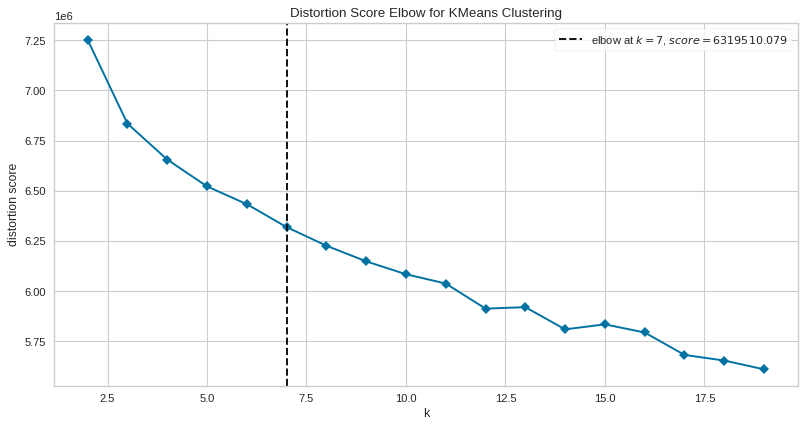

In [ ]:
## Metric = Distortion, which computes the sum of squared distances from each point to its assigned center. 
figure(figsize = (12, 6), dpi = 80)
model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k = (2,20), metric = 'distortion', timings = False)
visualizer.fit(Z2)
visualizer.show()

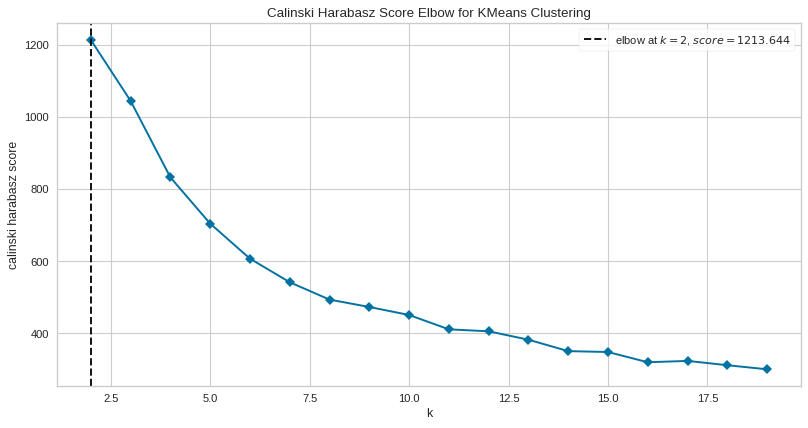

In [ ]:
## Metric = Calinski-Harabaszion, which score computes the ratio of dispersion between and within clusters.
figure(figsize = (12, 6), dpi = 80)
visualizer = KElbowVisualizer(model, k = (2,20), metric = 'calinski_harabasz', timings = False)
visualizer.fit(Z2)
visualizer.show()

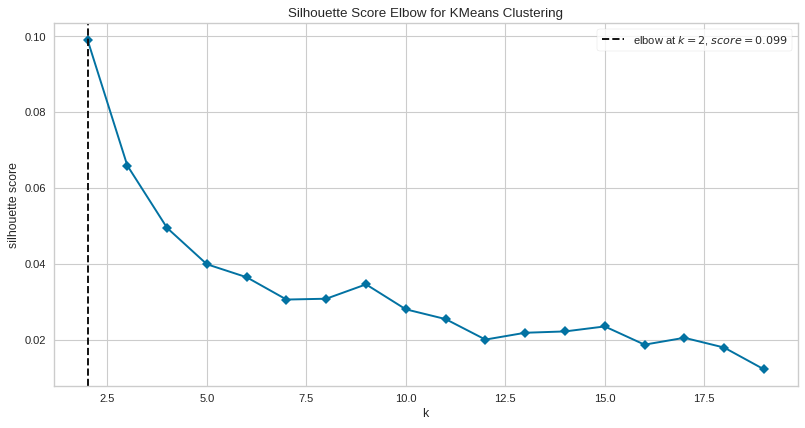

In [ ]:
## Metric = Silhouette, which score calculates the mean Silhouette Coefficient of all samples.
figure(figsize = (12, 6), dpi = 80)
visualizer = KElbowVisualizer(model, k = (2,20), metric = 'silhouette', timings = False)
visualizer.fit(Z2)
visualizer.show()

### 2.4 - Analysing your results

In [ ]:
## Add the list of cluster to dataset 
Z = pd.DataFrame(Z)
Z['cluster_12'] = cluster_12 

In [ ]:
Z.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,cluster_12
0,3.064849,-2.831589,-5.729978,4.316744,3.129221,2.052358,6.770295,-0.866999,-2.207433,4.398128,-4.815142,1.518511,-4.292408,5.288776,-0.313838,2.191539,-0.964954,-0.942773,1.600828,0.739939,-2.261945,-0.835331,-1.989693,1.663556,0.245751,-3.182379,0.320655,0.957173,3.210551,-0.600194,1.330839,-1.316388,-0.002667,-0.698462,-1.729454,1.856724,-1.506390,2.377169,-0.660971,-0.340542,-3.263969,-0.013245,-1.443718,-0.717360,1.682789,0.489983,2.042114,1.332147,-0.296035,0.473354,0.611951,0.937544,-0.104555,1.616836,-1.153070,-1.585754,-0.220216,-0.528155,-1.146545,-2.422353,1.069767,0.277392,-0.295876,4
1,5.775029,-5.416029,-5.295198,-1.580781,-3.646130,2.632201,-1.540514,5.934789,-0.102422,4.215868,-2.155764,2.505115,-0.911807,3.826839,1.978222,1.414908,-1.844117,-3.983110,-0.612405,1.483711,0.388609,-1.442001,-0.015714,3.585421,0.389612,-1.065766,1.388909,-0.447937,1.236075,0.068605,2.067720,-0.540475,-0.592127,0.728173,-3.090387,-0.439931,-0.979652,1.361186,2.549790,2.357500,-0.316553,-0.861418,-0.851712,-1.466467,3.362865,0.812371,-0.262717,0.972362,0.592669,-1.066389,-1.160548,0.454529,-1.079982,-0.083025,-2.599944,-1.170376,-0.195097,-1.238873,-0.149774,-0.507287,-0.650328,0.893198,0.411697,4
2,2.648080,-4.175493,-4.569957,-0.041332,-2.860837,2.094845,-1.275281,-0.315749,-0.100084,1.836875,-2.051694,3.126571,-3.259031,2.596994,0.170699,2.231499,-0.516802,-3.101971,2.411321,-1.503274,-2.913391,-1.394451,2.218486,2.838376,-0.615166,-1.928976,1.820476,-0.247708,0.094223,-0.150519,1.272948,2.772211,1.085103,-2.039939,-0.312135,0.725741,-1.641434,0.397542,2.004948,1.564528,-1.373810,-0.345909,-1.141654,-1.377168,-0.650188,1.458724,0.781534,-0.027286,-2.021507,0.442614,-0.210446,2.216602,-1.473105,2.036536,-3.116759,-0.907232,-2.361728,0.615146,-0.838890,-1.202350,-1.199162,1.506561,1.375364,4
3,9.234913,3.775000,-5.545841,0.699968,-1.413928,0.426163,-1.814266,4.046189,-0.539085,4.977383,-1.920963,6.719147,2.054402,0.310927,-1.547769,-4.132607,-0.089768,-2.731083,3.527946,-1.013561,-2.586001,3.323053,-2.332978,0.005254,2.041952,-0.829880,-1.756317,0.793297,0.194241,2.571039,-1.735934,-2.696700,2.455623,-0.591208,0.274002,-5.769041,-1.246138,-0.044766,-0.178684,1.059918,-1.444050,-0.220837,-0.434316,-2.658855,2.505102,1.622691,0.560247,-0.232789,-4.291800,-0.568013,2.583597,0.486105,1.730453,-0.677343,-0.684793,-0.127586,1.130949,-0.471296,0.406995,-0.636077,0.709149,0.194866,1.737456,9
4,1.306618,-9.465927,-4.280237,0.747145,-3.842896,-1.208390,-2.934347,-2.197162,-0.511378,2.553976,-0.510711,1.405750,-1.352031,1.074685,-0.928036,1.833188,2.295927,-1.669374,0.631459,2.418053,-0.078134,-2.432385,0.269018,0.174332,-1.215254,-2.270264,2.394836,0.326568,1.607412,1.108830,-1.255134,-0.327092,0.876635,-2.208845,-0.654325,0.566157,-1.348874,-1.198655,2.135779,-0.575339,-1.347962,-0.427463,-0.607911,0.337198,1.477528,0.253536,-0.247333,-0.372204,-0.907106,-0.152948,0.235667,-0.025401,0.749870,0.541306,-0.074447,-2.240163,-0.742984,-2.546209,0.703664,-2.418568,-2.549477,2.344405,0.475233,10


### 2.4.1

We select the features of interest that may be relevant to identifying the genre of the song. In particular:
- acoustiness
- danceability
- energy
- instrumentalness
- liveness
- speechiness
- tempo
- valence
- duration

In [ ]:
## Extract from first dataset
d_pivot = df1[['audio_features_acousticness','audio_features_danceability','audio_features_energy', 'audio_features_instrumentalness', 'audio_features_liveness',
               'audio_features_speechiness', 'audio_features_tempo', 'audio_features_valence']]

In [ ]:
# Extract track duration
d_pivot['track_duration'] = df3.track_duration;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
d_pivot.head()

,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,track_duration
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,168
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,237
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,206
3,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,161
4,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,311


### 2.4.2
If any of your selected variables are numerical (continuous or discrete), then categorize them into 4 categories.

In [ ]:
pd.options.mode.chained_assignment = None  

In [ ]:
## discrete each variable in 4 groups
for i in d_pivot.columns:
    d_pivot[i] = pd.qcut(d_pivot[i], q = 4)

In [ ]:
d_pivot.head()

,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,track_duration
0,"(0.104, 0.574]","(0.629, 0.969]","(0.549, 0.776]","(-0.001, 0.323]","(0.119, 0.211]","(0.0855, 0.966]","(145.318, 251.072]","(0.418, 0.666]","(137.0, 200.0]"
1,"(0.104, 0.574]","(0.486, 0.629]","(0.776, 1.0]","(-0.001, 0.323]","(0.101, 0.119]","(0.0855, 0.966]","(120.057, 145.318]","(0.197, 0.418]","(200.0, 289.0]"
2,"(-0.000999096, 0.104]","(0.629, 0.969]","(0.549, 0.776]","(-0.001, 0.323]","(0.211, 0.98]","(0.0855, 0.966]","(95.967, 120.057]","(0.418, 0.666]","(200.0, 289.0]"
3,"(0.921, 0.996]","(0.629, 0.969]","(0.776, 1.0]","(0.918, 0.998]","(0.101, 0.119]","(0.0213, 0.0369]","(95.967, 120.057]","(0.666, 1.0]","(137.0, 200.0]"
4,"(0.104, 0.574]","(0.486, 0.629]","(0.549, 0.776]","(-0.001, 0.323]","(0.0243, 0.101]","(0.0855, 0.966]","(95.967, 120.057]","(0.666, 1.0]","(289.0, 18350.0]"


### 2.4.3 - 2.4.4 - 2.4.5

Pivot table for Acoustincess.

In [ ]:
## Acoustincess
pv_a = pd.crosstab(d_pivot.audio_features_acousticness , cluster_12,  normalize = 'columns')\
.round(4)*100

In [ ]:
## Index Col
pv_a = pv_a.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)
## Index Row
pv_a.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
## Add Total
pv_a = pv_a.append(pv_a.sum().rename('Total'))

In [ ]:
## Check
pv_a

col_0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12
Category 1,4.92,51.83,73.01,31.82,19.51,39.05,7.69,0.25,0.43,25.77,18.34,39.89
Category 2,16.99,35.02,21.88,25.03,32.25,32.97,23.95,0.76,2.24,21.56,32.43,33.39
Category 3,35.78,11.75,4.91,27.29,34.29,20.60,35.03,0.76,12.58,29.98,30.90,19.66
Category 4,42.31,1.40,0.20,15.85,13.95,7.38,33.33,98.24,84.75,22.70,18.34,7.06
Total,100.00,100.00,100.00,99.99,100.00,100.00,100.00,100.01,100.00,100.01,100.01,100.00


The **first** category is prevalent in the first, third, fourth, eighth and ninth clusters, while the **second** category does not prevail in any cluster, but is significant for the fifth cluster.
The **third** category is prevalent in the fifth cluster.
The **fourth** category is prevalent in the second, tenth, eleventh and twelfth clusters.

Pivot table for Danceability.

In [ ]:
## Danceability
pv_d = pd.crosstab(d_pivot.audio_features_danceability , cluster_12,  normalize = 'columns')\
.round(4)*100

In [ ]:
## Index Col
pv_d = pv_d.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)
## Index Row
pv_d.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
## Add Total
pv_d = pv_d.append(pv_d.sum().rename('Total'))


In [ ]:
## Check
pv_d

col_0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12
Category 1,26.70,6.03,24.74,35.16,16.15,27.01,21.54,30.73,38.59,56.53,4.41,5.62
Category 2,29.74,13.69,26.79,34.92,20.62,30.87,27.88,37.28,32.52,25.27,13.75,10.83
Category 3,28.38,27.48,26.18,22.41,26.74,28.49,32.89,24.18,19.40,12.56,28.69,22.23
Category 4,15.18,52.80,22.29,7.51,36.49,13.62,17.69,7.81,9.49,5.64,53.14,61.32
Total,100.00,100.00,100.00,100.00,100.00,99.99,100.00,100.00,100.00,100.00,99.99,100.00


The **first** category predominates in the first, third, fourth, ninth, tenth, eleventh and twelfth clusters, while the **second** category predominates in the fifth cluster.
The **third** category is prevalent in the seventh cluster.
The **fourth** category is prevalent in the sixth and eighth clusters.

Pivot table for Energy.

In [ ]:
## Energy
pv_e = pd.crosstab(d_pivot.audio_features_energy , cluster_12,  normalize = 'columns')\
.round(4)*100

In [ ]:
## Index Col
pv_e = pv_e.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)
## Index Row
pv_e.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
## Add Total
pv_e = pv_e.append(pv_e.sum().rename('Total'))

In [ ]:
## Check
pv_e

col_0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12
Category 1,59.05,3.66,5.32,6.20,5.95,3.35,29.13,86.65,89.77,7.00,22.92,24.88
Category 2,33.73,23.17,8.59,22.53,23.98,21.85,43.07,11.59,9.17,10.28,33.62,41.57
Category 3,6.53,35.02,17.59,32.42,37.05,41.15,21.98,1.51,1.07,23.98,29.37,26.16
Category 4,0.68,38.15,68.51,38.86,33.02,33.65,5.81,0.25,0.00,58.74,14.09,7.38
Total,99.99,100.00,100.01,100.01,100.00,100.00,99.99,100.00,100.01,100.00,100.00,99.99


The **first** category is prevalent in the second, tenth and eleventh clusters, while the **second** category is not prevalent in any cluster, but significant for the fifth and seventh clusters.
The **third** category is prevalent in the fifth, seventh, eighth and ninth clusters.
The **fourth** category is prevalent in the first, third, fourth and sixth clusters.

Pivot table for Instrumentalness.

In [ ]:
## Instrumentalness
pv_i = pd.crosstab(d_pivot.audio_features_instrumentalness , cluster_12,  normalize = 'columns')\
.round(4)*100

In [ ]:
## Index Col
pv_i = pv_i.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)
## Index Row
pv_i.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
## Add Total
pv_i = pv_i.append(pv_i.sum().rename('Total'))

In [ ]:
## Check
pv_i

col_0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12
Category 1,21.22,29.63,14.11,25.63,25.69,25.65,31.90,9.57,27.40,12.56,61.46,22.07
Category 2,22.22,30.17,34.97,26.34,30.26,27.53,23.50,7.81,18.02,22.34,18.68,26.73
Category 3,24.83,29.09,30.67,23.00,27.40,26.11,21.18,12.59,20.47,25.70,12.39,32.18
Category 4,31.74,11.10,20.25,25.03,16.65,20.72,23.41,70.03,34.12,39.40,7.47,19.02
Total,100.01,99.99,100.00,100.00,100.00,100.01,99.99,100.00,100.01,100.00,100.00,100.00


The **first** category is prevalent in the second, tenth and eleventh clusters, while the **second** category is not prevalent in any cluster, but significant for the fifth and seventh clusters.
The **third** category is prevalent in the fifth, seventh, eighth and ninth clusters.
The **fourth** category is prevalent in the first, third, fourth and sixth clusters.

Pivot table for Liveness.

In [ ]:
## Liveness
pv_l = pd.crosstab(d_pivot.audio_features_liveness , cluster_12,  normalize = 'columns')\
.round(4)*100

In [ ]:
## Index Col
pv_l = pv_l.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)
## Index Row
pv_l.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
## Add Total
pv_l = pv_l.append(pv_l.sum().rename('Total'))

In [ ]:
## Check
pv_l

col_0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12
Category 1,20.35,37.61,24.95,22.88,24.64,25.77,27.44,5.04,25.69,17.77,29.20,32.34
Category 2,42.44,17.13,11.66,23.24,21.17,24.12,26.72,7.56,33.16,18.49,21.22,28.57
Category 3,21.41,21.88,30.06,30.75,24.75,26.62,25.47,19.65,22.92,30.26,25.13,21.03
Category 4,15.81,23.38,33.33,23.12,29.44,23.50,20.38,67.76,18.23,33.48,24.45,18.06
Total,100.01,100.00,100.00,99.99,100.00,100.01,100.01,100.01,100.00,100.00,100.00,100.00


The **first** category is prevalent in the eighth and twelfth clusters, while the **second** category is prevalent in the second, seventh, ninth, eleventh and twelfth clusters.
The **third** category is prevalent in the fifth and ninth clusters.
The **fourth** category is prevalent in the first, third, fourth and sixth clusters.

Pivot table for Speechiness.

In [ ]:
## Speechiness
pv_s = pd.crosstab(d_pivot.audio_features_speechiness , cluster_12,  normalize = 'columns')\
.round(4)*100

In [ ]:
## Index Col
pv_s = pv_s.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)
## Index Row
pv_s.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
## Add Total
pv_s = pv_s.append(pv_s.sum().rename('Total'))

In [ ]:
## Check
pv_s

col_0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12
Category 1,47.29,9.05,12.88,41.36,7.88,36.44,48.79,16.12,26.65,18.63,5.43,7.30
Category 2,30.86,16.38,21.27,30.15,16.81,30.42,28.33,30.48,40.30,26.62,6.96,16.53
Category 3,14.81,28.99,35.38,22.29,29.77,23.38,16.00,22.92,22.92,36.47,15.96,29.94
Category 4,7.03,45.58,30.47,6.20,45.53,9.76,6.88,30.48,10.13,18.27,71.65,46.23
Total,99.99,100.00,100.00,100.00,99.99,100.00,100.00,100.00,100.00,99.99,100.00,100.00


The **first** category is prevalent in the second, fifth and seventh clusters, while the **second** category is prevalent in the ninth, tenth, eleventh and twelfth clusters.
The **third** category is prevalent in the first and third clusters.
The **fourth** category is prevalent in the fourth, sixth and eighth clusters.

Pivot table for Tempo.

In [ ]:
## Tempo
pv_t = pd.crosstab(d_pivot.audio_features_tempo , cluster_12,  normalize = 'columns')\
.round(4)*100

In [ ]:
## Index Col
pv_t = pv_t.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)
## Index Row
pv_t.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
## Add Total
pv_t = pv_t.append(pv_t.sum().rename('Total'))

In [ ]:
## Check
pv_t

col_0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12
Category 1,31.80,23.60,20.86,14.78,23.59,17.82,25.38,33.5,39.98,17.77,33.45,27.85
Category 2,27.63,22.20,22.90,23.36,23.65,23.04,30.47,26.2,27.72,22.70,24.96,25.60
Category 3,24.14,27.69,28.22,31.35,24.04,31.73,22.70,20.4,18.98,23.27,16.13,24.64
Category 4,16.43,26.51,28.02,30.51,28.72,27.41,21.45,19.9,13.33,36.26,25.47,21.91
Total,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,100.01,100.00,100.01,100.00


The **first** category is prevalent in the second, tenth and twelfth clusters while the **second** category is prevalent in the ninth cluster.
The **third** category is prevalent in the fifth, seventh and eighth clusters.
The **fourth** category is prevalent in the first, third, fourth, sixth, ninth and eleventh clusters.

Pivot table for Valence.

In [ ]:
## Valence
pv_v = pd.crosstab(d_pivot.audio_features_valence , cluster_12,  normalize = 'columns')\
.round(4)*100

In [ ]:
## Index Col
pv_v = pv_v.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)
## Index Row
pv_v.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
## Add Total
pv_v = pv_v.append(pv_v.sum().rename('Total'))

In [ ]:
## Check
pv_v

col_0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12
Category 1,40.14,16.16,24.34,13.47,16.48,15.55,29.49,10.33,50.96,34.26,8.49,24.40
Category 2,28.19,22.09,29.24,27.18,21.00,26.73,27.26,27.20,28.68,22.98,14.94,24.80
Category 3,19.54,30.71,25.56,28.96,27.18,28.66,23.06,27.96,12.15,22.20,29.03,28.25
Category 4,12.13,31.03,20.86,30.39,35.34,29.06,20.20,34.51,8.21,20.56,47.54,22.55
Total,100.00,99.99,100.00,100.00,100.00,100.00,100.01,100.00,100.00,100.00,100.00,100.00


The **first** category is prevalent in the second, third, fourth, ninth, tenth, eleventh and twelfth clusters while the **second** category is prevalent in the seventh cluster.
The **third** category is prevalent in the first, seventh and eighth clusters.
The **fourth** category is prevalent in the fifth, sixth and eighth clusters.

Pivot table for Duration.

In [ ]:
## Duration
pv_d = pd.crosstab(d_pivot.track_duration , cluster_12,  normalize = 'columns')\
.round(4)*100

In [ ]:
## Index Col
pv_d = pv_d.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)
## Index Row
pv_d.index = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
## Add Total
pv_d = pv_d.append(pv_d.sum().rename('Total'))

In [ ]:
## Check
pv_d

col_0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12
Category 1,25.89,26.83,26.58,24.55,24.20,24.06,25.20,33.25,24.95,24.41,29.54,23.43
Category 2,24.08,26.83,27.61,23.60,24.86,25.43,25.20,22.67,24.95,24.98,21.22,26.48
Category 3,25.39,24.57,22.29,26.82,26.24,24.80,25.74,20.65,25.27,21.70,24.79,26.48
Category 4,24.64,21.77,23.52,25.03,24.70,25.71,23.86,23.43,24.84,28.91,24.45,23.60
Total,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.01,100.00,100.00,99.99


The **first** category is prevalent in the second, sixth, eighth, eleventh and twelfth clusters while the **second** category is prevalent in the seventh and tenth clusters.
The **third** category is prevalent in the fifth cluster.
The **fourth** category is prevalent in the first, third and ninth clusters.

### 2.4.6
What is the most representative genre for each one of the clusters?

In [ ]:
## Sup Join
sup = pd.merge(left = df1, right = df3, left_on = 'track_id', right_on = 'track_id')
## Extract Genre
song_genre = sup.track_genre_top

Compare the obtained clusters to the reality genre.

In [ ]:
## Genre
pv_g = pd.crosstab(song_genre , cluster_12,  normalize = 'columns')\
.round(4)*100

In [ ]:
## Index Col
pv_g = pv_g.rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)
## Add Total
pv_g = pv_g.append(pv_g.sum().rename('Total'))

In [ ]:
## Check
pv_g

col_0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12
track_genre_top,,,,,,,,,,,,
Blues,2.28,0.00,0.28,0.47,1.14,0.00,0.72,0.00,1.72,0.09,0.48,0.39
Classical,3.19,0.00,0.00,0.00,0.30,0.08,2.87,3.11,29.47,0.26,0.48,0.13
Electronic,9.66,68.25,56.86,5.97,27.35,9.31,22.38,1.41,12.38,9.55,27.27,57.68
Experimental,0.00,0.16,0.28,0.47,0.08,0.08,0.43,0.28,0.47,0.09,0.48,0.00
Folk,29.17,1.11,3.08,7.54,2.20,4.26,20.80,5.37,28.84,2.84,1.91,2.06
Hip-Hop,1.09,15.96,4.76,2.83,23.33,4.42,2.30,0.28,0.78,3.27,47.85,17.81
Instrumental,1.91,0.00,0.00,0.31,0.91,0.63,2.01,0.00,1.41,0.60,0.96,0.90
International,2.28,0.16,0.00,0.47,1.14,0.95,6.03,0.56,1.10,1.20,0.72,1.16
Jazz,5.83,0.95,0.28,0.78,2.35,0.95,2.58,0.28,7.68,1.20,3.35,3.35


* **Blues**: for most clusters its contribution is almost null.
* **Classical**: it contributes to the second cluster with 8.27% and the twelfth cluster with 9.14%.
* **Electronic**: it contributes to the second cluster with 8.27% and the twelfth cluster with 9.14%.
* **Blues**: for most clusters its contribution is almost null.
* **Blues**:
* **Blues**:
* **Blues**:
* **Blues**:
* **Blues**:
* **Blues**:
* **Blues**:
* **Blues**:



### 2.4.7

In [ ]:
## we do not use 'echonest.csv' variables.
df2 = pd.read_csv('features.csv')

In [ ]:
df2.isnull().sum()

track_id                   0
chroma_cens_kurtosis_01    0
chroma_cens_kurtosis_02    0
chroma_cens_kurtosis_03    0
chroma_cens_kurtosis_04    0
                          ..
zcr_mean_01                0
zcr_median_01              0
zcr_min_01                 0
zcr_skew_01                0
zcr_std_01                 0
Length: 519, dtype: int64

Dimensionality Reduction

In [ ]:
## Standardization
scaler = StandardScaler()
df_scale2 = scaler.fit_transform(df2)
df_scale2 = pd.DataFrame(df_scale2)
df_scale2.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518
0,-1.777029,0.208784,0.452353,-0.008553,0.056482,0.079044,0.017718,0.071164,0.152168,0.090291,0.129122,0.047420,0.033249,0.810197,-0.289042,-0.145634,0.423180,-0.455556,-1.671116,-1.144862,-1.286545,-0.186224,-0.299154,0.336056,-0.119001,2.665005,1.614101,-0.164951,-0.320927,-0.393423,-0.318194,-0.213805,-0.047518,-0.765763,-0.857419,-0.459850,1.147505,2.457595,1.652448,0.100004,...,0.002324,-0.707736,-0.263574,-0.224117,0.987561,0.182526,0.941346,0.696081,1.279680,-0.335420,0.923162,0.126354,0.812596,0.717914,1.333886,1.302365,0.511569,1.208792,1.521369,0.967858,-0.504956,1.426932,0.274355,0.323328,1.134257,-0.467784,-3.022798,-1.318924,-0.226649,-1.594439,-1.200560,-1.537657,-1.595043,-0.266432,0.425841,1.007362,0.874131,-0.454603,-0.369213,0.775698
1,-1.777007,0.044880,0.050426,0.001063,0.106160,0.090461,-0.020371,0.064405,0.046439,-0.012742,0.040801,0.031417,0.035625,0.637811,-0.110113,-0.322858,-0.088839,-1.716767,-1.441497,-0.531687,0.583716,-0.905734,-0.813934,0.154703,-0.544165,-0.298108,-0.297577,-0.296125,-0.480501,-0.423014,-0.025600,1.763173,2.156390,0.850571,-0.004497,0.412165,-0.092449,-0.188827,-0.197095,-0.321209,...,-1.030474,-0.293628,-0.216487,-0.015757,0.177297,0.767854,-0.638702,1.493421,-0.300535,-0.052967,0.208804,0.726020,-0.484535,1.364113,-0.432938,0.500661,0.770768,1.418181,-0.047990,1.954450,0.810134,0.577882,-0.302202,0.269032,-1.814091,1.249080,1.444967,-0.516551,-1.452787,-1.271129,-0.938948,-1.210805,-0.675913,-0.299409,0.463112,0.975158,0.643107,-0.454603,-0.491744,1.064853
2,-1.776962,0.002712,-0.024945,-0.061548,0.021789,0.109332,0.046419,-0.070494,-0.081502,0.063099,0.092097,-0.008355,0.028350,-0.135179,0.696900,-1.297672,-1.605830,-1.556359,-1.560414,-1.042074,-0.589041,0.918043,0.035097,-0.406956,0.058168,0.016407,0.709248,0.018641,-0.454507,-0.100879,-0.117865,0.443244,0.531742,1.327525,0.595293,0.166335,-0.154833,0.072337,0.562125,0.059394,...,-1.375322,-0.218907,0.034549,-0.597282,-1.486165,-0.471921,0.196878,0.261671,-0.578786,-0.611351,-1.546994,-0.292636,0.181758,0.279534,-0.545264,-0.167451,-0.207293,-0.517863,1.269226,1.385607,-2.728832,2.228279,0.209649,-0.838638,0.002533,-0.517197,-1.898425,-0.610996,-1.182017,-0.372433,-1.561604,-1.461126,-1.162622,-0.254636,-0.034719,0.011006,-0.065367,-0.454603,-0.335249,0.167182
3,-1.776850,0.101044,-0.044147,0.186567,-0.026460,0.071382,0.056075,0.088195,0.081984,0.043355,0.207549,0.201431,0.035981,-1.865851,-0.636383,-1.835063,0.671720,-0.181450,-0.908812,0.682990,-1.068005,-0.904029,-1.376660,0.538679,0.435616,-0.333716,0.485762,-0.114997,-0.338853,-0.781394,0.600875,2.386129,1.238794,0.240983,0.000546,0.475923,0.053255,-0.189086,0.407508,-0.059326,...,-1.250265,1.540934,-0.630279,-1.668173,-1.475965,-0.038551,-1.314430,0.666956,0.486482,-1.664254,-1.558035,-0.096544,-1.157187,0.485260,0.421423,0.271677,-1.700334,0.335784,-0.417967,0.810502,1.820607,-0.120928,-0.513332,-0.023208,-2.007936,2.594519,0.746281,-1.121204,0.046623,-0.287477,-0.655213,-0.595296,-1.299392,-0.090255,0.385908,0.758699,0.889532,-0.454603,0.107731,0.018234
4,-1.776626,-0.019632,-0.035814,-0.013339,-0.000614,0.031972,-0.018958,-0.033153,-0.074345,-0.021467,-0.133378,-0.073489,-0.039377,0.350352,0.994860,0.677509,0.111521,0.506647,1.117271,0.833085,0.827771,0.505643,0.641495,1.090435,0.916548,-0.665909,-0.084322,0.172613,-0.884541,-0.909661,-0.088299,0.483259,0.517938,-0.055752,0.629438,0.965764,0.032395,-0.500937,-0.235502,-0.057003,...,-0.316716,0.774707,-0.146151,0.906008,0.526437,-0.335985,-1.340416,0.397575,-0.874956,0.803713,0.562105,-0.363817,-1.235536,0.297470,-0.808743,-0.573286,-2.025075,-0.348783,-0.848667,-0.164191,-0.604540,0.450336,-0.424901,0.100236,0.105479,0.468032,-0.279087,0.349954,

In [ ]:
## Implement PCA
pca_7 = PCA()
pca_7.fit(df_scale2)

## Cumulated Variance and extract the number of components which cumulate > 70% of total variance.
cumvar_7 = np.cumsum(pca_7.explained_variance_ratio_)
cumvar_7 = cumvar_7[cumvar_7 <= 0.70].tolist()
comp_7 = len(cumvar_7) + 1 

In [ ]:
## Explained Variance Ratio
np.cumsum(pca_7.explained_variance_ratio_)[0:100]

array([0.11958374, 0.1874777 , 0.2293676 , 0.26292975, 0.2925737 ,
       0.32038962, 0.34554118, 0.36952293, 0.39217525, 0.4132241 ,
       0.43124958, 0.44705746, 0.46145674, 0.47509646, 0.48803459,
       0.5004642 , 0.51123841, 0.5219353 , 0.53206063, 0.54120111,
       0.54978703, 0.55829979, 0.56631217, 0.57425045, 0.58151324,
       0.58866396, 0.5955317 , 0.60209893, 0.60861527, 0.61474649,
       0.62072148, 0.62649414, 0.63195497, 0.63726327, 0.64231086,
       0.64727193, 0.6520706 , 0.65678787, 0.66140215, 0.66592846,
       0.67025726, 0.67452998, 0.67872779, 0.68287964, 0.68699835,
       0.69093793, 0.69482307, 0.69859165, 0.70226357, 0.70589248,
       0.70941705, 0.71288569, 0.71621327, 0.71950494, 0.72273494,
       0.72587736, 0.72894928, 0.73200059, 0.73493855, 0.7378324 ,
       0.74071917, 0.74355031, 0.74632354, 0.74903123, 0.75170745,
       0.75437253, 0.75699471, 0.7595858 , 0.76215448, 0.7646548 ,
       0.76711332, 0.76955983, 0.77197499, 0.77435769, 0.77671

In [ ]:
## Result
print('70% of variance is caught by', comp_7, 'components')

70% of variance is caught by 49 components


As we can see, the 70% of variance is caught by 49 components.


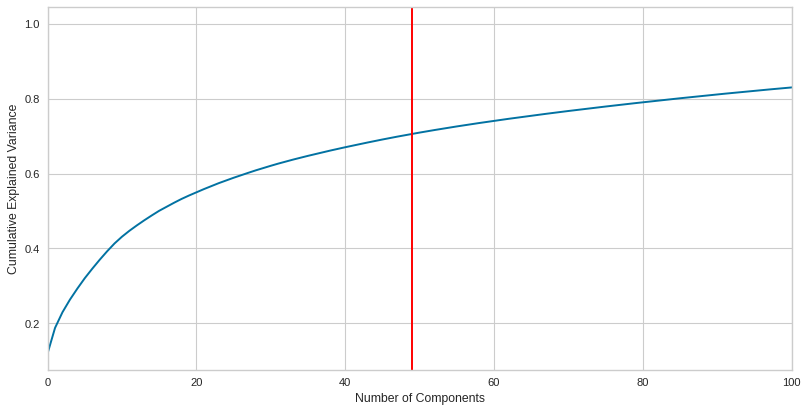

In [ ]:
## Plot of Cumulative Variance
figure(figsize = (12, 6), dpi = 80)
plt.plot(np.cumsum(pca_7.explained_variance_ratio_))
plt.axvline(comp_7, color = 'red');
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlim((0,100))
print('As we can see, the 70% of variance is caught by', comp_7, 'components.')

Extract Score Z.

In [ ]:
## Extract Score
Z_7 = pca_7.transform(df_scale2)
Z_7 = pd.DataFrame(Z_7)
## We extract the projection of X in the principal components.

## Extract first 64 cocmponents.
Z_7 = Z_7.iloc[0:, :comp_7]

In [ ]:
Z_7.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,2.068593,-3.083422,-5.607146,0.089989,2.249217,-3.640133,-5.066747,-0.886592,-5.111744,-4.070370,3.585124,-1.155297,-2.193002,-1.573641,0.220032,0.440694,-1.344295,1.221410,-0.011509,1.639264,-1.201653,-0.383259,0.301130,-2.878768,0.308195,-3.053914,0.885797,1.421619,-0.435708,0.546396,1.339932,-0.794004,-0.498419,-0.552833,-0.833120,0.516878,1.428983,-0.843470,-0.097180,0.685662,-2.344613,0.364824,-1.873556,-0.444921,-1.317197,-0.138377,-0.813653,1.638466,0.948647
1,3.517696,-5.379005,-4.375864,-1.099544,-3.096943,2.193261,-0.251831,4.732148,-0.607941,-3.421656,2.985285,0.134993,-0.702381,0.918763,-1.059146,-2.524813,-0.176615,0.530011,-2.195340,0.587260,-0.105680,-1.785395,1.482772,-3.072867,0.505874,-2.723294,-0.733024,1.008545,-1.024832,2.381488,-0.816577,0.711948,0.382430,-1.087067,1.793196,-1.462591,2.562650,-1.669668,1.164626,0.909555,-1.657453,1.186884,-0.920298,0.441711,-0.156772,0.703442,-0.603167,2.646457,-0.225554
2,0.963001,-3.172202,-3.536635,-0.921913,-1.138314,0.432859,-2.405475,1.271016,0.981096,-1.737389,2.822091,-2.357753,-0.634205,0.486661,0.109794,-0.432664,-1.247439,0.604627,0.687678,2.567775,0.245937,-1.021039,-0.116221,-2.406160,-3.450963,-1.942256,2.765476,1.730487,-1.834876,-0.205597,2.074485,0.027574,-0.791743,-0.518614,2.579213,0.213070,0.610536,-1.854229,1.746514,1.033168,-0.911742,0.534654,-0.627407,0.351997,-1.108636,0.048361,-1.506454,1.881045,-0.131072
3,6.703884,1.335512,-5.168767,-0.903519,-2.189899,-0.131155,0.060408,3.909131,0.210869,-2.844601,1.378204,1.267416,0.340369,2.798704,2.676333,-1.365519,-0.662467,0.356928,-0.904042,1.038099,-2.453962,-2.814708,0.179128,0.911337,-1.281030,0.437088,-0.317926,-1.869223,3.706551,-1.127771,2.553829,1.158869,0.105933,0.994518,2.200906,0.030118,1.193457,0.275037,2.967279,0.200528,-0.067524,-0.146217,0.127454,0.675483,-0.145602,-0.488542,-0.693741,-1.212776,-0.768164
4,0.878848,-1.118556,2.943494,-0.813227,-2.469070,4.524003,-0.179465,-1.829652,1.020078,-2.039061,-0.917411,-2.105305,1.350476,5.725442,-0.103471,0.453214,1.763556,-0.330497,0.531735,-1.341142,1.841900,1.073639,1.098958,0.423160,1.121001,1.063938,-1.392446,1.370131,0.919851,0.389293,-1.283378,-1.358928,0.160629,-1.255494,0.474765,-1.800035,0.717649,-2.414680,-1.176631,1.307208,0.134006,2.077007,-0.782403,-1.797943,0.007810,-0.460793,-0.505087,-0.512119,-0.255379


Find the optimal number of clusters.

In [ ]:
## Metric = Distortion, which computes the sum of squared distances from each point to its assigned center. 
figure(figsize = (12, 6), dpi = 80)
model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k = (2,20), metric = 'distortion', timings = False)
visualizer.fit(Z_7)
visualizer.show()

In [ ]:
## Metric = Calinski-Harabaszion, which score computes the ratio of dispersion between and within clusters.
figure(figsize = (12, 6), dpi = 80)
visualizer = KElbowVisualizer(model, k = (2,20), metric = 'calinski_harabasz', timings = False)
visualizer.fit(Z_7)
visualizer.show()

In [ ]:
## Metric = Silhouette, which score calculates the mean Silhouette Coefficient of all samples. (115 components)
figure(figsize = (12, 6), dpi = 80)
visualizer = KElbowVisualizer(model, k = (2,20), metric = 'silhouette', timings = False)
visualizer.fit(Z_7)
visualizer.show()

Characterize your clusters using 5-10 variables.

Compare your results with those of the previous exercise. If you could choose, would you rather collect more observations (with fewer features) or fewer observations (with more features) based on the previous analyses?

## Question 3 - Algorithmic question
You are given a list of integers, A, and another integer s. Write an algorithm that outputs all the pairs in A that equal x.

In [ ]:
# findPair function take List and integer s = 4
def findPair(A,s):
    
    # length or size is store in length var of List A
    length = len(A)
    # initialize counter variable to 0
    counter = 0
    # declare pairList List to store all the pairs which has sum equal to 4
    pairList = []
    # outer for loop goes till length of List A
    for i in range(length):
        # Inner for loop goes till length of List A for every iteration of outer for loop 
        for j in range(i+1,length):
            # sum both elements which are adjacent to each other and store in pairSum
            pairSum = A[i]+A[j]
            # compare the pairSum in the list to s which is equal to 4
            if pairSum == s:
                firstPair = A[i]
                secondPair = A[j]
                # store the element of pair which has sum equal to 4
                strPair = "("+str(firstPair)+","+str(secondPair)+")"
                # add to the pairList List which contains only pair sum
                pairList.append(strPair)
    
    # return pairList to the main function             
    return pairList        

# Main function 
if __name__ == "__main__":
    
    
    returnPairList = []
    
    # declare and initialize the list A of integers numbers
    A = [7,-2,8,2,6,4,-7,2,1,3,-3]
    # declare and initialize the s equal to 4
    s=4
    # call to function findPair and pass the List and S
    returnPairList = findPair(A,s)
    print (str(returnPairList)[1:-1]) 
    
    # for i in range(len(returnPairList)):
    #     print(*returnPairList[i])
    